In [5]:
import os
import sys
sys.path.append('/home/kal/TF_models/bin/')
os.environ['CUDA_VISIBLE_DEVICES'] = '1' # Must be before importing keras!

import sequence
import train_TFmodel
import eval_TFmodel
import seq_only_gen

import ucscgenome
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [6]:
# get the generator
gen = seq_only_gen.TFGenerator('/home/kal/TF_models/seq_only/ctcfgen.hdf5')
g = gen.pair_gen(mode='val')

In [77]:
# get the model
ml = eval_TFmodel.TFmodel('/home/kal/TF_models/seq_only/seq_classifier/20170919_sigmoid_model/')
#ml = eval_TFmodel.TFmodel('/home/kal/TF_models/seq_only/seq_regression/20180125_174348_CTCF/')
pwm = eval_TFmodel.TFmodel('/home/kal/TF_models/seq_only/seq_classifier/pwm_frozen/')

Loading model without Bias layer


In [78]:
# get the genome
genome = ucscgenome.Genome('/home/kal/.ucscgenome/hg19.2bit')

In [84]:
# get the well filtered/merged snvs
# annotate the thouis dataset
thouis_path = '/home/kal/TF_models/data/SNVs/thouis_snvs/snvs_5altfiltered_merge.bed'
snvs = pd.read_table(thouis_path)
snvs.columns = 'chr start end refAllele altAllele refCount altCount'.split()
# beacuse of 0 index, 1-index differnces
snvs['position'] = snvs.start - 1

# get predicitons
all_refpreds, all_altpreds = ml.predict_snv(snvs, genome)
all_prefpreds, all_paltpreds = pwm.predict_snv(snvs, genome)

Sequence at chrM 16520 is too short!
Sequence at chrM 16520 is too short!
Sequence at chrM 16520 is too short!
Sequence at chrM 16520 is too short!


In [85]:
# get differences

allelic_ratio = [alt/(alt+ref) for alt, ref in zip(snvs.altCount, snvs.refCount)]
diffs = all_altpreds - all_refpreds
pdiffs = all_paltpreds - all_prefpreds
ratios = [alt/(ref+alt) for ref, alt in zip(all_refpreds, all_altpreds)]
pratios = [alt/(ref+alt) for ref, alt in zip(all_prefpreds, all_paltpreds)]

/home/thouis/VENV/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in float_scalars


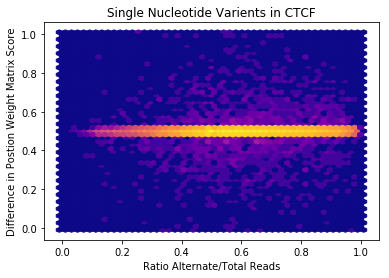

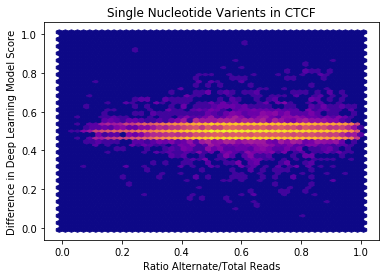

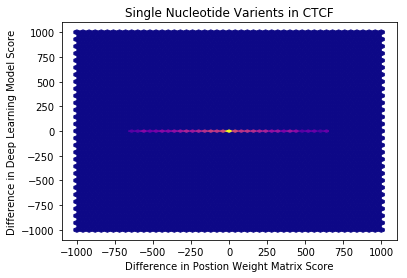

In [81]:
plt.hexbin(allelic_ratio, pratios, gridsize=50, bins='log', cmap='plasma', extent=(-.01, 1.01,-.01, 1.01))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Ratio Alternate/Total Reads')
plt.ylabel('Difference in Postion Weight Matrix Score')
plt.show()

plt.hexbin(allelic_ratio, ratios, gridsize=50, bins='log', cmap='plasma', extent=(-.01, 1.01, -.01, 1.01))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Ratio Alternate/Total Reads')
plt.ylabel('Difference in Deep Learning Model Score')
plt.show()

plt.hexbin(pdiffs, diffs, gridsize=50, bins='log', cmap='plasma', extent=(-1000, 1000, -1000, 1000))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Difference in Postion Weight Matrix Score')
plt.ylabel('Difference in Deep Learning Model Score')
plt.show()

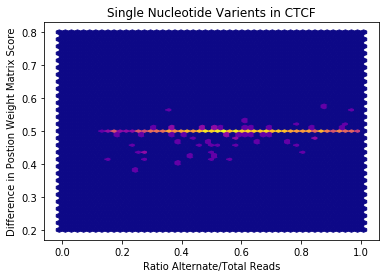

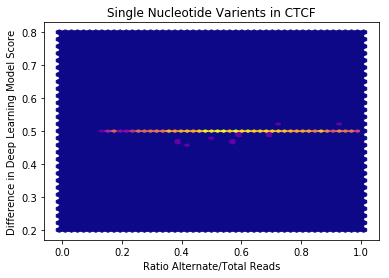

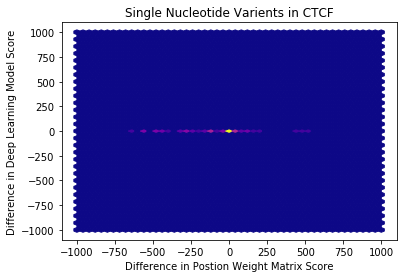

In [82]:
# get only strong pwm signals
strong_filter = [((pref > 1700) or (palt > 1700)) for pref, palt in zip(all_prefpreds, all_paltpreds)]
refpreds = all_refpreds[strong_filter]
altpreds = all_altpreds[strong_filter]
prefpreds = all_prefpreds[strong_filter]
paltpreds = all_paltpreds[strong_filter]

# get differences
allelic_ratio = [alt/(alt+ref) for alt, ref in zip(snvs.altCount[strong_filter], snvs.refCount[strong_filter])]
diffs = altpreds - refpreds
pdiffs = paltpreds - prefpreds
ratios = [alt/(ref+alt) for ref, alt in zip(refpreds, altpreds)]
pratios = [alt/(ref+alt) for ref, alt in zip(prefpreds, paltpreds)]

plt.hexbin(allelic_ratio, pratios, gridsize=50, bins='log', cmap='plasma', extent=(-.01, 1.01, .2, .8))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Ratio Alternate/Total Reads')
plt.ylabel('Difference in Postion Weight Matrix Score')
plt.show()

plt.hexbin(allelic_ratio, ratios, gridsize=50, bins='log', cmap='plasma', extent=(-.01, 1.01, .2, .8))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Ratio Alternate/Total Reads')
plt.ylabel('Difference in Deep Learning Model Score')
plt.show()

plt.hexbin(pdiffs, diffs, gridsize=50, bins='log', cmap='plasma', extent=(-1000, 1000, -1000, 1000))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Difference in Postion Weight Matrix Score')
plt.ylabel('Difference in Deep Learning Model Score')
plt.show()

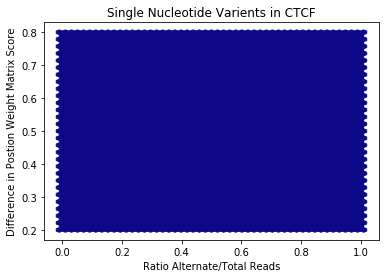

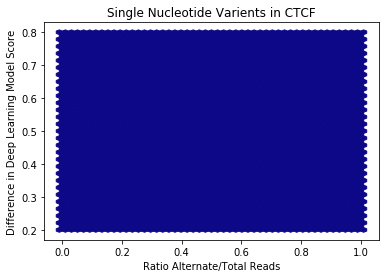

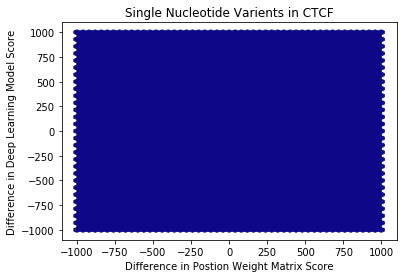

In [83]:
# get only strong machine learning signals
strong_filter = [((ref > 900) or (alt > 900)) for ref, alt in zip(all_refpreds, all_altpreds)]
refpreds = all_refpreds[strong_filter]
altpreds = all_altpreds[strong_filter]
prefpreds = all_prefpreds[strong_filter]
paltpreds = all_paltpreds[strong_filter]

# get differences
allelic_ratio = [alt/(alt+ref) for alt, ref in zip(snvs.altCount[strong_filter], snvs.refCount[strong_filter])]
diffs = altpreds - refpreds
pdiffs = paltpreds - prefpreds
ratios = [alt/(ref+alt) for ref, alt in zip(refpreds, altpreds)]
pratios = [alt/(ref+alt) for ref, alt in zip(prefpreds, paltpreds)]

plt.hexbin(allelic_ratio, pratios, gridsize=50, bins='log', cmap='plasma', extent=(-.01, 1.01, .2, .8))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Ratio Alternate/Total Reads')
plt.ylabel('Difference in Postion Weight Matrix Score')
plt.show()

plt.hexbin(allelic_ratio, ratios, gridsize=50, bins='log', cmap='plasma', extent=(-.01, 1.01, .2, .8))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Ratio Alternate/Total Reads')
plt.ylabel('Difference in Deep Learning Model Score')
plt.show()

plt.hexbin(pdiffs, diffs, gridsize=50, bins='log', cmap='plasma', extent=(-1000, 1000, -1000, 1000))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Difference in Postion Weight Matrix Score')
plt.ylabel('Difference in Deep Learning Model Score')
plt.show()

2481


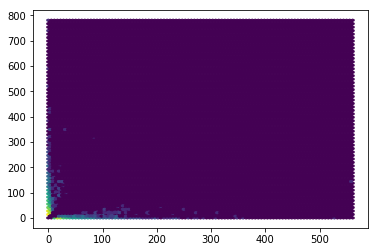

2434


In [42]:
# get the snvs from the 1000 genomes set
genomes_path = '/home/kal/TF_models/data/SNVs/1000genomes_SNVs/1000genomes_all_SNVs_motifcount.bed'
#genomes_pth = '/home/kal/TF_models/data/SNVs/1000genomes_SNVs/1000genomes_motif_SNVs.bed'
snvs = pd.read_table(genomes_path)
snvs.columns = 'chr position end variantID refAllele A C T G motifCount'.split()
ctcf_snvs = snvs[snvs.variantID.apply(lambda x: 'CTCF' in x)].copy()

# change the 1000 genomes data to be the same format
order = {'A':0, 'C':1, 'G':2, 'T':3}
rorder = ['A', 'C', 'G', 'T']
for index, row in ctcf_snvs.iterrows():
    counts = [row['A'], row['C'], row['G'], row['T']]
    refCount = counts[order[row['refAllele']]]
    counts[order[row['refAllele']]] = 0
    altCount = max(counts)
    altAllele = rorder[counts.index(altCount)]
    # set this in the snvs
    ctcf_snvs.set_value(index, 'refCount', refCount)
    ctcf_snvs.set_value(index, 'altCount', altCount)
    ctcf_snvs.set_value(index, 'altAllele', altAllele)
    
# filter the snvs for high read counts
print(len(ctcf_snvs))
ctcf_snvs = ctcf_snvs[ctcf_snvs['refCount'] + ctcf_snvs['altCount'] > 10]
#ctcf_snvs = ctcf_snvs[abs(ctcf_snvs['refCount'] - ctcf_snvs['altCount']) > 30]
plt.hexbin(ctcf_snvs.refCount, ctcf_snvs.altCount, bins='log')
plt.show()
print(len(ctcf_snvs))

In [43]:
# get predicitons
prefpreds, paltpreds = pwm.predict_snv(ctcf_snvs, genome)
#filter for strong motifs
ctcf_snvs = ctcf_snvs[[(pref > 1250) or (palt > 1250) for pref, palt in zip(prefpreds, paltpreds)]]
refpreds, altpreds = ml.predict_snv(ctcf_snvs, genome)
prefpreds, paltpreds = pwm.predict_snv(ctcf_snvs, genome)
print(len(ctcf_snvs))

224


In [44]:
# get differences
allelic_ratio = [int(alt)/(int(alt) + int(ref)) for alt, ref in zip(ctcf_snvs.altCount, ctcf_snvs.refCount)]
diffs = altpreds - refpreds
pdiffs = paltpreds - prefpreds
ratios = [alt/(ref+alt) for ref, alt in zip(refpreds, altpreds)]
pratios = [alt/(ref+alt) for ref, alt in zip(prefpreds, paltpreds)]

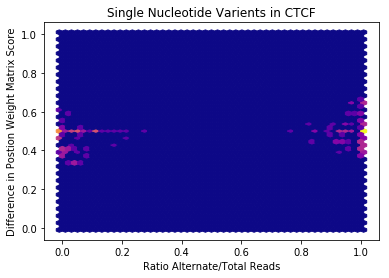

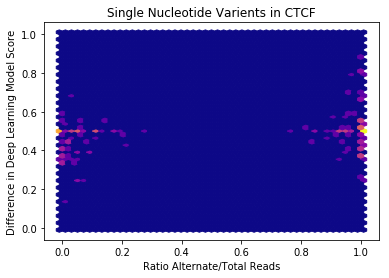

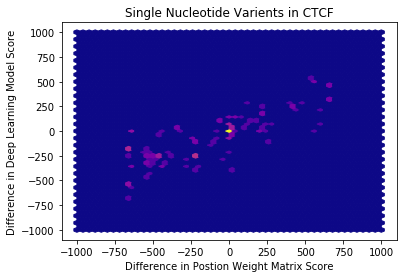

In [45]:
plt.hexbin(allelic_ratio, pratios, gridsize=50, bins='log', cmap='plasma', extent=(-.01, 1.01, -.01, 1.01))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Ratio Alternate/Total Reads')
plt.ylabel('Difference in Postion Weight Matrix Score')
plt.show()

plt.hexbin(allelic_ratio, ratios, gridsize=50, bins='log', cmap='plasma', extent=(-.01, 1.01, -.01, 1.01))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Ratio Alternate/Total Reads')
plt.ylabel('Difference in Deep Learning Model Score')
plt.show()

plt.hexbin(pdiffs, diffs, gridsize=50, bins='log', cmap='plasma', extent=(-1000, 1000, -1000, 1000))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Difference in Postion Weight Matrix Score')
plt.ylabel('Difference in Deep Learning Model Score')
plt.show()

0
chr                       chr1
position               3723202
end                    3723203
variantID     CTCF_NA18486_ASB
refAllele                    T
A                            0
C                           23
T                            0
G                            0
motifCount                   0
refCount                     0
altCount                    23
altAllele                    C
Name: 18, dtype: object
Masked average prediciton difference


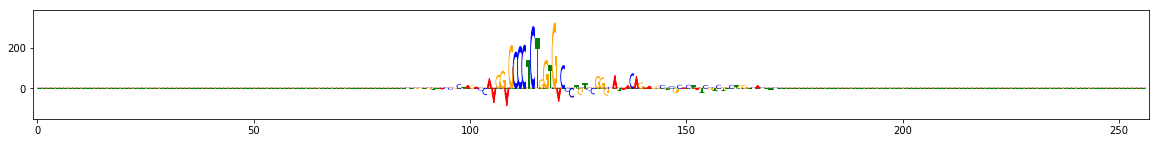

Information Content of Softmax prediction difference


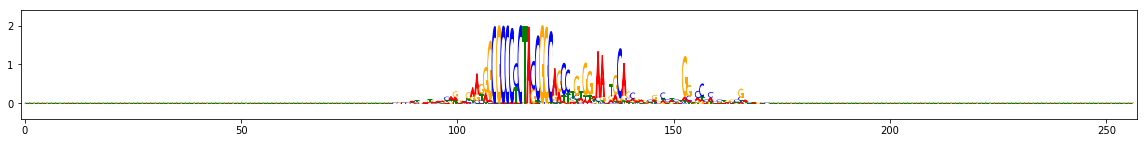

(array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32))

In [76]:
mystery_idx = sum(allelic_ratio == 0.07407407407407407)
print(mystery_idx)
mystery_row = ctcf_snvs.iloc[mystery_idx]
print(mystery_row)
seq = genome[mystery_row.chr][-128+mystery_row.position:128+mystery_row.position]
alt_seq = seq[:128] + mystery_row.altAllele.lower()+ seq[129:]
alt = sequence.Sequence(alt_seq)
#ml.get_importance(seq, viz=True)
ml.get_importance(alt, viz=True)

In [ ]:
# annotate the thouis dataset
thouis_path = '/home/kal/TF_models/data/snvs/all_snvs_merged.bed'
snvs = pd.read_table(thouis_path)
snvs.columns = 'chr start end refAllele altAllele refCount altCount'.split()
snvs['position'] = snvs.start - 1

# filter the snvs for only legal chrs
snvs = snvs[snvs['chr']!='contig']
snvs['position'] = [int(position) for position in snvs.position]
snvs = snvs[snvs['refAllele'].isin(['A', 'C', 'T', 'G'])]
snvs = snvs[snvs['altAllele'].isin(['A', 'C', 'T', 'G'])]

# filter the snvs for high read counts
snvs = snvs[snvs['refCount'] + snvs['altCount'] > 10]
snvs = snvs[(snvs['refCount'] > 1) & (snvs['altCount'] > 1)]
plt.hexbin(snvs.refCount, snvs.altCount, bins='log')
plt.show()

In [ ]:
# get predicitons
all_refpreds, all_altpreds = ml.predict_snv(snvs, genome)
all_prefpreds, all_paltpreds = pwm.predict_snv(snvs, genome)

In [ ]:
# get differences
allelic_ratio = [int(alt)/(int(alt) + int(ref)) for alt, ref in zip(snvs.altCount, snvs.refCount)]
diffs = all_altpreds - all_refpreds
pdiffs = all_paltpreds - all_prefpreds
ratios = [alt/(ref+alt) for ref, alt in zip(all_refpreds, all_altpreds)]
pratios = [alt/(ref+alt) for ref, alt in zip(all_prefpreds, all_paltpreds)]

In [ ]:
plt.hexbin(allelic_ratio, pratios, gridsize=50, bins='log', cmap='plasma', extent=(-.01, 1.01,-.01, 1.01))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Ratio Alternate/Total Reads')
plt.ylabel('Difference in Postion Weight Matrix Score')
plt.show()

plt.hexbin(allelic_ratio, ratios, gridsize=50, bins='log', cmap='plasma', extent=(-.01, 1.01, -.01, 1.01))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Ratio Alternate/Total Reads')
plt.ylabel('Difference in Deep Learning Model Score')
plt.show()

plt.hexbin(pdiffs, diffs, gridsize=50, bins='log', cmap='plasma', extent=(-1000, 1000, -1000, 1000))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Difference in Postion Weight Matrix Score')
plt.ylabel('Difference in Deep Learning Model Score')
plt.show()

In [ ]:
# get only strong pwm signals
strong_filter = [((pref > 1500) or (palt > 1500)) for pref, palt in zip(all_prefpreds, all_paltpreds)]
refpreds = all_refpreds[strong_filter]
altpreds = all_altpreds[strong_filter]
prefpreds = all_prefpreds[strong_filter]
paltpreds = all_paltpreds[strong_filter]

# get differences
allelic_ratio = [int(alt)/(int(alt) + int(ref)) for alt, ref in zip(snvs.altCount[strong_filter], snvs.refCount[strong_filter])]
diffs = altpreds - refpreds
pdiffs = paltpreds - prefpreds
ratios = [alt/(ref+alt) for ref, alt in zip(refpreds, altpreds)]
pratios = [alt/(ref+alt) for ref, alt in zip(prefpreds, paltpreds)]

plt.hexbin(allelic_ratio, pratios, gridsize=50, bins='log', cmap='plasma', extent=(-.01, 1.01, .2, .8))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Ratio Alternate/Total Reads')
plt.ylabel('Difference in Postion Weight Matrix Score')
plt.show()

plt.hexbin(allelic_ratio, ratios, gridsize=50, bins='log', cmap='plasma', extent=(-.01, 1.01, .2, .8))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Ratio Alternate/Total Reads')
plt.ylabel('Difference in Deep Learning Model Score')
plt.show()

plt.hexbin(pdiffs, diffs, gridsize=50, bins='log', cmap='plasma', extent=(-1000, 1000, -1000, 1000))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Difference in Postion Weight Matrix Score')
plt.ylabel('Difference in Deep Learning Model Score')
plt.show()

In [ ]:
# get only strong machine learning signals
strong_filter = [((ref > 900) or (alt > 900)) and (abs(alt-ref) > 1) for ref, alt in zip(all_refpreds, all_altpreds)]
refpreds = all_refpreds[strong_filter]
altpreds = all_altpreds[strong_filter]
prefpreds = all_prefpreds[strong_filter]
paltpreds = all_paltpreds[strong_filter]

# get differences
allelic_ratio = [int(alt)/(int(alt) + int(ref)) for alt, ref in zip(snvs.altCount[strong_filter], snvs.refCount[strong_filter])]
diffs = altpreds - refpreds
pdiffs = paltpreds - prefpreds
ratios = [alt/(ref+alt) for ref, alt in zip(refpreds, altpreds)]
pratios = [alt/(ref+alt) for ref, alt in zip(prefpreds, paltpreds)]

plt.hexbin(allelic_ratio, pratios, gridsize=50, bins='log', cmap='plasma', extent=(-.01, 1.01, .2, .8))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Ratio Alternate/Total Reads')
plt.ylabel('Difference in Postion Weight Matrix Score')
plt.show()

plt.hexbin(allelic_ratio, ratios, gridsize=50, bins='log', cmap='plasma', extent=(-.01, 1.01, .2, .8))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Ratio Alternate/Total Reads')
plt.ylabel('Difference in Deep Learning Model Score')
plt.show()

plt.hexbin(pdiffs, diffs, gridsize=50, bins='log', cmap='plasma', extent=(-1000, 1000, -1000, 1000))
plt.title('Single Nucleotide Varients in CTCF')
plt.xlabel('Difference in Postion Weight Matrix Score')
plt.ylabel('Difference in Deep Learning Model Score')
plt.show()

In [ ]:
# plot some of the sequences the ml algorithm gets but the ml doesnt
strong_filter = [(abs(ml-.5) > .2) and (abs(pwm-.5)< .2) and ((ml<.5) == (alelle<.5)) for ml, pwm, allele in zip(ratios, pratios, allelic_ratio)]
intrigue = 